In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv( '../database/inmuebles_bogota.csv' )
col = {
    'Tipo': 'type',
    'Descripcion':'description',
    'Habitaciones':'bedrooms',
    'Baños':'bathrooms',
    'Área':'area',
    'Barrio':'mayoralty',
    'UPZ':'suburb',
    'Valor':'value'
}
df = df.rename( columns = col )
value = df['value'].str.split( expand = True )
df['currency'] = value[0]
df['price'] = value[1]
df['price'] = df['price'].str.replace( '.', '', regex = True )
df['price_K'] = df['price'].astype( 'float' ) / 1000000
pd.set_option( 'display.precision', 2 )
pd.set_option( 'display.float_format', lambda x: '%.2f' % x )
df['value_m2_K'] = df['price_K'] / df['area']
df.groupby('mayoralty').mean()
mayoralty_data = df.groupby('mayoralty').sum()
mayoralty_data['value_m2_mayoralty'] = mayoralty_data['price_K'] / mayoralty_data['area']
matoralty_m2 = dict( mayoralty_data['value_m2_mayoralty'] )
df['value_m2_mayoralty'] = df['mayoralty']
df['value_m2_mayoralty'] = df['value_m2_mayoralty'].map(matoralty_m2)
top_df = df['mayoralty'].value_counts()[:10].index
mayoralty_data.reset_index( inplace = True )
data_a = pd.read_csv( '../database/Identificación (Capítulo A).csv', encoding = 'latin-1', sep = ';' )
data_a = data_a.loc[ data_a['MPIO'] == 11001 ]
data_b = pd.read_csv( '../database/Datos de la vivenda y su entorno (Capítulo B).csv', encoding = 'latin-1', sep = ';')
data_c = pd.read_csv( '../database/Condiciones habitacionales del hogar (Capítulo C).csv', encoding = 'latin-1', sep = ';' )
#data_d = pd.read_csv( '../database/Servicios públicos domiciliarios y de TIC (Capítulo D).csv', encoding = 'latin-1', sep = ';' )
data_e = pd.read_csv( '../database/Composición del hogar y demografía (Capítulo E).csv', encoding = 'latin-1', sep = ';' )
#data_f = pd.read_csv( '../database/Salud (Capítulo F).csv', encoding = 'latin-1', sep = ';' )
#data_g = pd.read_csv( '../database/Atención integral de los niños y niñas menores de 5 anos (Capítulo G).csv', encoding = 'latin-1', sep = ';' )
data_h = pd.read_csv( '../database/Educaciвn (Capitulo H).csv', encoding = 'latin-1', sep = ';' )
#data_i = pd.read_csv( '../database/Uso de tecnologías de la información, TIC (Capítulo I).csv', encoding = 'latin-1', sep = ';' )
#data_j = pd.read_csv( '../database/Participación en organizaciones y redes sociales (Capítulo J).csv', encoding = 'latin-1', sep = ';' )
#data_k = pd.read_csv( '../database/Fuerza de trabajo (Capítulo K).csv', encoding = 'latin-1', sep = ';' )
data_l = pd.read_csv( '../database/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv', encoding = 'latin-1', sep = ';' )
#data_m1 = pd.read_csv( '../database/Gastos en alimentos y bebidas no alcohólicas de los hogares (Capítulo M1).csv', encoding = 'latin-1', sep = ';' )
#data_m2 = pd.read_csv( '../database/Gastos trimestrales y anuales del hogar (Capitulo M2).csv', encoding = 'latin-1', sep = ';' )
all_data = pd.merge(data_a, data_b, on = 'DIRECTORIO', how = 'left')
all_data = pd.merge(all_data, data_c, on = 'DIRECTORIO', how = 'left')
all_data = pd.merge(all_data, data_e, on = 'DIRECTORIO', how = 'left')

/tmp/ipykernel_43168/2546462502.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('mayoralty').mean()
/tmp/ipykernel_43168/2546462502.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mayoralty_data = df.groupby('mayoralty').sum()
/tmp/ipykernel_43168/2546462502.py:36: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_c = pd.read_csv( '../database/Condiciones habitacionales del hogar (Capítulo C).csv', encoding = 'latin-1', sep = ';' )
/tmp/ipykernel_43168/2546462502.py:38: DtypeWarning: Columns (66) have mixed types. Specify 

In [53]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


In [54]:
data_dane = pd.read_csv('../database/datos_dane.csv')
data_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [55]:
data_dane.shape

(9857, 55)

In [56]:
data_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


In [57]:
dic_dane = {
    'NVCBP4':'CONJUNTO_CERRADO',
    'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
    'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
    'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
    'NVCBP16A4':'MOV_NINOS_BEBES',
    'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
    'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
    'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
    'NPCKP64E':'PERDIDA_INGRESOS_C19',
    'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
    'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
    'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
    'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
    'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
    'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
    'NHCLP2C':'VICTIMA_PERSECUSION',
    'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
    'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
    'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
    'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
    'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
}
data_dane = data_dane.rename(columns=dic_dane)
data_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [58]:
data_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [59]:
data_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94


Con la funcion replace permite remplazar un valor por otro.

In [60]:
data = data_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace( 2, 0 )
data

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.00,1.00,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.00,1.00,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.00,1.00,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.00,1.00,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.00,1.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.00,1.00,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.00,1.00,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.00,1.00,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.00,1.00,0,1,0


In [61]:
data['NOMBRE_ESTRATO'].value_counts()

Niza                                                   243
SUBA: La Academia + Guaymaral + San José de Bavaria    212
CHAPINERO: Chicó Lago + El Refugio                     210
Los Libertadores                                       208
Modelia                                                205
                                                      ... 
Tunjuelito                                              26
Lourdes                                                 25
Localidad Chapinero resto                               21
Localidad Usaquén resto                                 10
Localidad Santa Fe resto                                 8
Name: NOMBRE_ESTRATO, Length: 102, dtype: int64

In [62]:
data.loc[ data['NOMBRE_ESTRATO']== '20 de Julio' ]

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.00,1.00,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.00,1.00,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.00,1.00,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.00,1.00,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.00,1.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.00,1.00,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.00,1.00,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.00,1.00,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.00,1.00,0,0,1


In [63]:
data_tratados = data.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
data_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


In [64]:
pd.merge( df, data_tratados, left_on = 'suburb', right_on = 'NOMBRE_ESTRATO', how = 'left' )

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value,currency,price,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.52,0.01,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.58,0.12,0.11,0.34,0.13,2794784.29,0.94,0.09,0.30,0.18
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.22,0.00,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.42,0.00,0.02,0.27,0.01,4832842.64,0.96,0.02,0.16,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.61,0.03,0.17,0.43,0.09,2144185.60,0.91,0.07,0.26,0.19
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.49,0.02,0.15,0.42,0.09,4177178.77,0.93,0.02,0.12,0.07
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.71,0.03,0.17,0.47,0.26,2356994.56,0.90,0.05,0.22,0.21
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.87,0.02,0.11,0.54,0.13,1418652.63,0.85,0.02,0.39,0.07


In [65]:

data_ml = pd.merge( df, data_tratados, left_on = 'suburb', right_on = 'NOMBRE_ESTRATO', how = 'left' ) 
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      9520 non-null   object 
 1   description               9520 non-null   object 
 2   bedrooms                  9520 non-null   int64  
 3   bathrooms                 9520 non-null   int64  
 4   area                      9520 non-null   int64  
 5   mayoralty                 9520 non-null   object 
 6   suburb                    9478 non-null   object 
 7   value                     9520 non-null   object 
 8   currency                  9520 non-null   object 
 9   price                     9520 non-null   object 
 10  price_K                   9520 non-null   float64
 11  value_m2_K                9520 non-null   float64
 12  value_m2_mayoralty        9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

In [66]:
upz = pd.read_csv('../database/cod_upz.csv')
upz

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.00
1,Santa Isabel,37.00
2,USAQUÉN: Country Club + Santa Bárbara,803.00
3,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Ciudad Salitre Occidental,110.00
...,...,...
90,Verbenal,9.00
91,Casa Blanca Suba,23.00
92,El Prado,19.00
93,Muzú,41.00


In [67]:
data_ml = pd.merge( data_ml, upz, left_on = 'suburb', right_on = 'NOMBRE_ESTRATO', how = 'inner' )
data_ml.head()

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value,currency,price,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [68]:
data_ml.shape

(9318, 26)

In [69]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      9318 non-null   object 
 1   description               9318 non-null   object 
 2   bedrooms                  9318 non-null   int64  
 3   bathrooms                 9318 non-null   int64  
 4   area                      9318 non-null   int64  
 5   mayoralty                 9318 non-null   object 
 6   suburb                    9318 non-null   object 
 7   value                     9318 non-null   object 
 8   currency                  9318 non-null   object 
 9   price                     9318 non-null   object 
 10  price_K                   9318 non-null   float64
 11  value_m2_K                9318 non-null   float64
 12  value_m2_mayoralty        9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

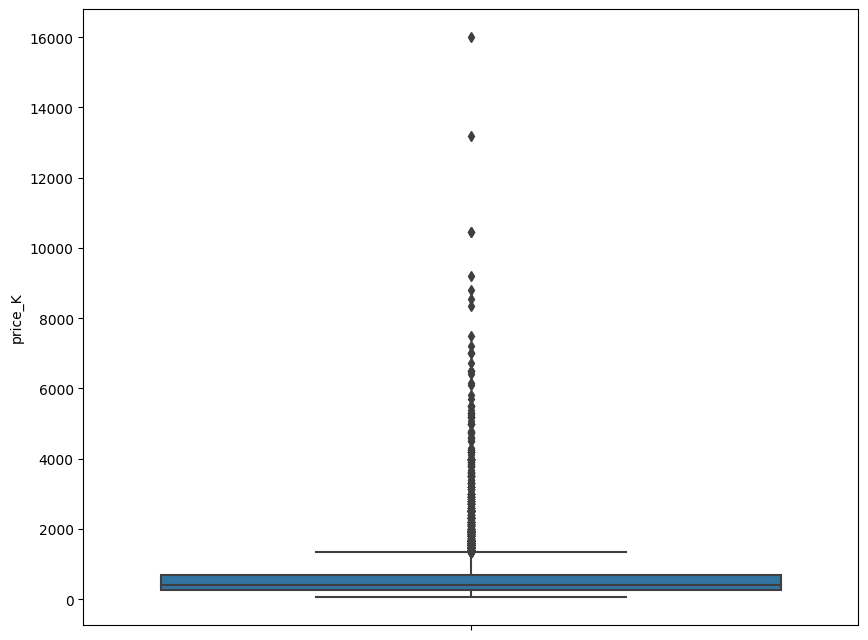

In [70]:
plt.figure( figsize = (10, 8) )
sns.boxplot( data = data_ml, y = 'price_K')
plt.show()

In [71]:
data_ml = data_ml.query('price_K < 1200 & price_K > 60')
data_ml

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value,currency,price,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,$,580000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,$,278000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00


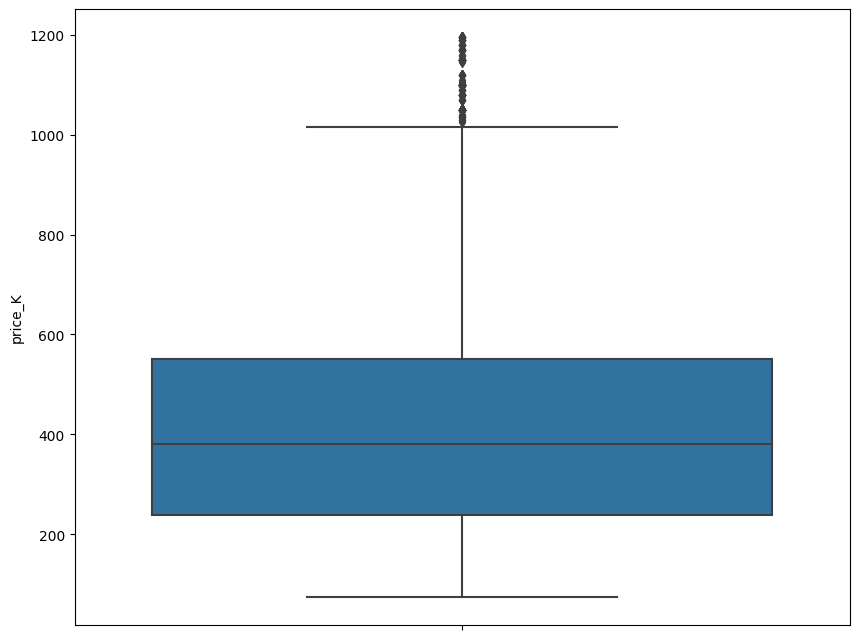

In [72]:
plt.figure( figsize = (10, 8) )
sns.boxplot( data = data_ml, y = 'price_K')
plt.show()

In [73]:
data_ml['SALARIO_ANUAL_K'] = data_ml['SALARIO_MES'] * 12 / 1000000
data_ml['SALARIO_ANUAL_K']

0      48.42
1      48.42
3      48.42
9      48.42
10     48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: SALARIO_ANUAL_K, Length: 8313, dtype: float64

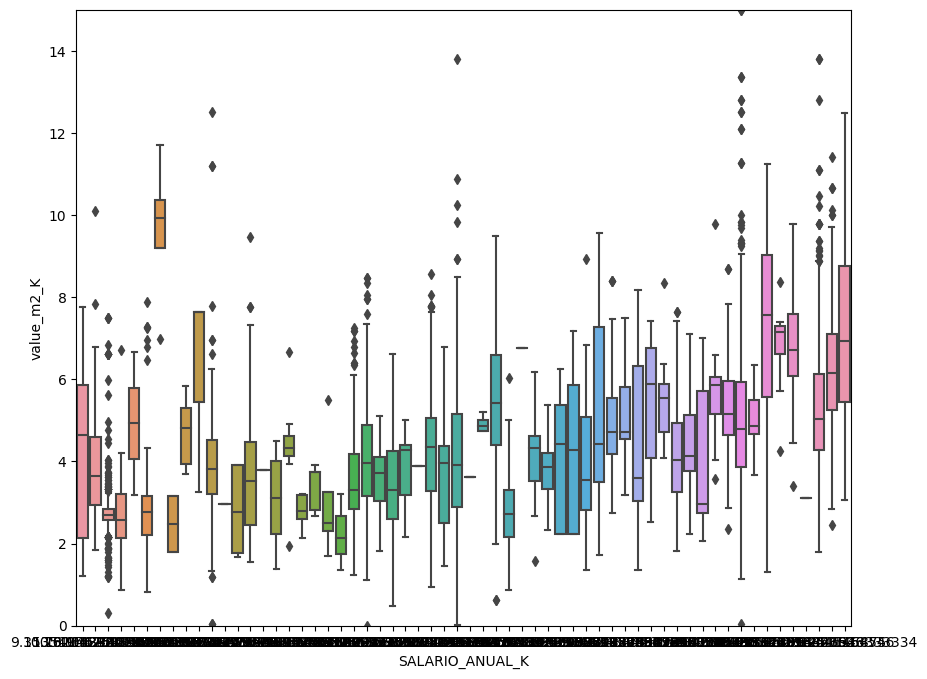

In [74]:
plt.figure( figsize = (10, 8) )
sns.boxplot( data = data_ml, x = 'SALARIO_ANUAL_K', y = 'value_m2_K' )
#plt.xlim()
plt.ylim(0,15)
plt.show()

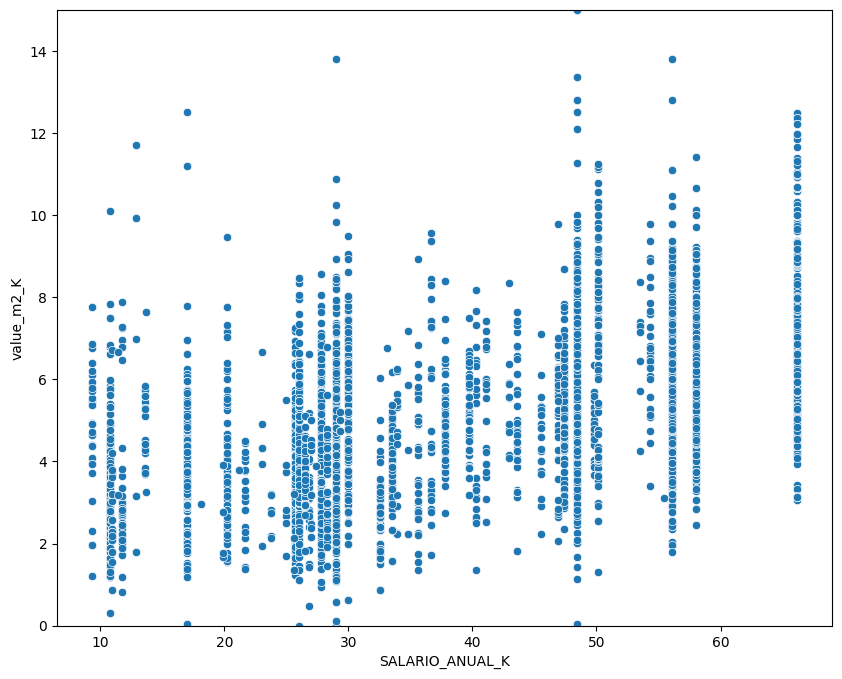

In [75]:
plt.figure( figsize = (10, 8) )
sns.scatterplot( data = data_ml, x = 'SALARIO_ANUAL_K', y = 'value_m2_K' )
#plt.xlim()
plt.ylim(0,15)
plt.show()

La funcion corr permite calcule la correlación por pares de columnas, excluyendo NA/valores nulos.

In [76]:
data_ml.corr()

/tmp/ipykernel_43168/1523936246.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_ml.corr()


,bedrooms,bathrooms,area,price_K,value_m2_K,value_m2_mayoralty,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_K
bedrooms,1.00,0.44,0.03,0.18,-0.31,-0.21,-0.12,0.13,0.08,0.11,0.14,0.11,-0.17,-0.08,0.07,0.13,0.09,-0.12,-0.17
bathrooms,0.44,1.00,0.04,0.66,-0.03,0.13,0.16,-0.19,-0.17,-0.12,-0.17,-0.21,0.18,0.13,-0.09,-0.15,-0.08,0.01,0.18
area,0.03,0.04,1.00,0.04,-0.04,-0.04,-0.01,-0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,0.02,0.01,0.01,-0.01,-0.01
price_K,0.18,0.66,0.04,1.00,0.36,0.40,0.32,-0.37,-0.28,-0.23,-0.35,-0.38,0.42,0.21,-0.17,-0.32,-0.18,0.17,0.42
value_m2_K,-0.31,-0.03,-0.04,0.36,1.00,0.49,0.33,-0.37,-0.29,-0.22,-0.37,-0.35,0.46,0.23,-0.20,-0.36,-0.21,0.26,0.46
value_m2_mayoralty,-0.21,0.13,-0.04,0.40,0.49,1.00,0.65,-0.66,-0.38,-0.41,-0.66,-0.60,0.82,0.41,-0.31,-0.65,-0.23,0.41,0.82
CONJUNTO_CERRADO,-0.12,0.16,-0.01,0.32,0.33,0.65,1.00,-0.84,-0.30,-0.51,-0.70,-0.67,0.81,0.61,-0.35,-0.78,0.05,0.08,0.81
INSEGURIDAD,0.13,-0.19,-0.00,-0.37,-0.37,-0.66,-0.84,1.00,0.51,0.60,0.85,0.75,-0.82,-0.56,0.29,0.74,0.09,0.00,-0.82
TERMINALES_BUS,0.08,-0.17,-0.01,-0.28,-0.29,-0.38,-0.30,0.51,1.00,0.39,0.67,0.57,-0.51,-0.30,0.17,0.36,0.25,-0.09,-0.51
BARES_DISCO,0.11,-0.12,-0.01,-0.23,-0.22,-0.41,-0.51,0.60,0.39,1.00,0.60,0.49,-0.38,-0.25,-0.02,0.33,-0.05,0.26,-0.38


/tmp/ipykernel_43168/1608975014.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


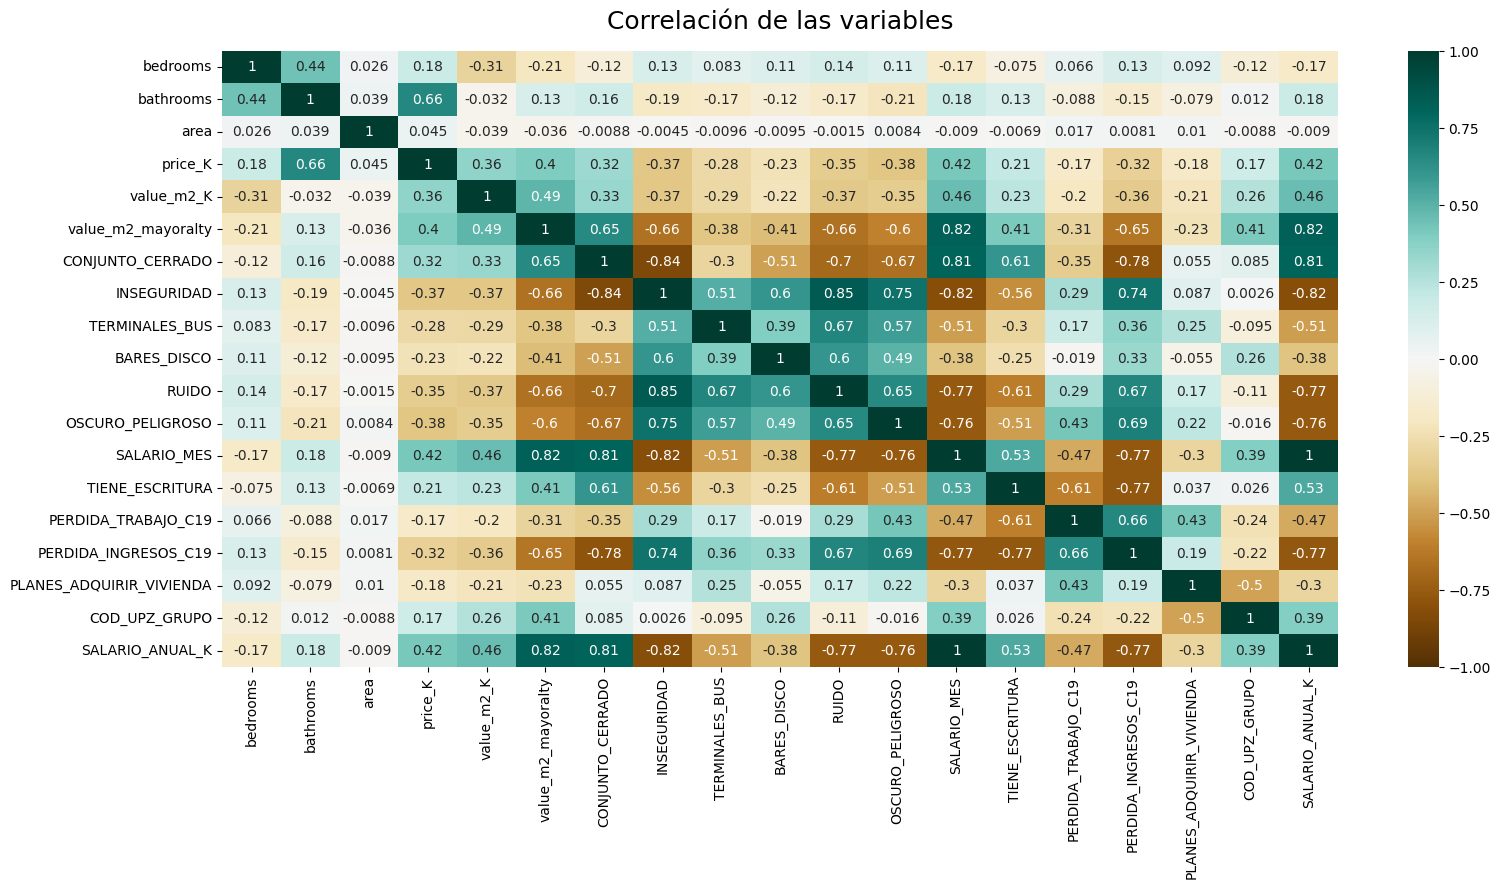

In [77]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(data_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

LinearRegression: Ajusta un modelo lineal con coeficientes w = (w1, …, wp) para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal.

train_test_split: Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba. Utilidad rápida que envuelve la validación de entrada, next(ShuffleSplit().split(X, y)) y la aplicación para ingresar datos en una sola llamada para dividir (y opcionalmente submuestrear) datos en una sola línea.

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data_ml[[ 'COD_UPZ_GRUPO' ]]
y = data_ml[[ 'price_K' ]]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 99 )

In [79]:
X_train

,COD_UPZ_GRUPO
1512,817.00
7864,85.00
6058,21.00
1683,817.00
2481,14.00
...,...
6038,21.00
8875,102.00
2200,14.00
3883,803.00


In [80]:
X_test

,COD_UPZ_GRUPO
6340,74.00
7805,85.00
4902,47.00
7041,100.00
2436,14.00
...,...
3323,14.00
3945,803.00
5572,27.00
3633,803.00


In [81]:
y_train

,price_K
1512,1050.00
7864,129.00
6058,206.38
1683,650.00
2481,250.00
...,...
6038,560.00
8875,560.00
2200,685.00
3883,850.00


In [82]:
y_test

,price_K
6340,199.90
7805,120.80
4902,400.00
7041,340.00
2436,355.00
...,...
3323,700.00
3945,510.00
5572,220.00
3633,420.00


In [83]:
model = LinearRegression()

la funcion fit permite ajustar modelo lineal.

In [84]:
model.fit( X_train, y_train )

LinearRegression()

la duncion predict prediga utilizando el modelo lineal.

In [85]:
y_predict_test = model.predict(X_test)

mean_absolute_error: Pérdida de regresión de error absoluto medio.

r2_score: Función de puntuación de regresión R² (coeficiente de determinación). La mejor puntuación posible es 1,0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor). En el caso general, cuando la y verdadera no es constante, un modelo constante que siempre prediga la y promedio sin tener en cuenta las características de entrada obtendría una puntuación de 0,0. En el caso particular en que y_true es constante, la puntuación no es finita: es NaN (predicciones perfectas) o -Inf (predicciones imperfectas). Para evitar que estos números no finitos contaminen los experimentos de nivel superior, como una validación cruzada de búsqueda de cuadrícula, estos casos se reemplazan de manera predeterminada con 1.0 (predicciones perfectas) o 0.0 (predicciones imperfectas) respectivamente. Puede establecer force_finite en False para evitar que ocurra esta solución.

In [86]:
from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_mae

187.323609443345

In [87]:
baseline_r2 = r2_score(y_test, y_predict_test)
baseline_r2

0.031111799984413713

In [88]:
X = data_ml[['COD_UPZ_GRUPO','bedrooms','bathrooms','CONJUNTO_CERRADO','SALARIO_ANUAL_K','TIENE_ESCRITURA']] #

Y = data_ml["price_K"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_predict_test = model_1.predict(X_test)
y_predict_train = model_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

118.25967274431333 0.5404735562069192
123.22271988681675 0.5269614226488988
